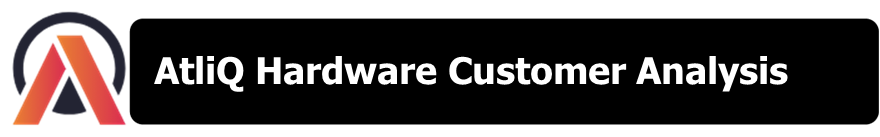

#### AtliQ Project Analysis Plan Overview

The TTWC team assigned to AtliQ will conduct the necessary research, and create informative dashboards that AtliQ will be able to use later. Certain sections of the TTWC team will select one of the three above areas to focus on. My team is responsible for Customer Analysis.

During the Customer Analysis, customer segmentation will be used to understand the purchasers and gain an understanding on more effective sales, marketing, and personalization strategies. Each segment can answer a myriad of questions that the company may have. To further help with the segmentation, we will connect the customers to the products and sales data to give a better overview of the customer focused analysis.

The goal is to segment the customer data on various metrics and create an actionable dashboard. This will allow AtliQ to gain a better understanding of their customers' habits and possibly give insight on new, potential markets.

<b>For the full project description, please see the Decomposition Plan at this link: </b>https://docs.google.com/document/d/1W89R6AFbVVj972i1OBRxMvB8koglFIlKIWlW4L8XKDw/edit?usp=sharing

<b>To access the Dashboard Visualization, please use this link: </b> https://public.tableau.com/app/profile/julynda.vaughn/viz/AtliQCustomerAnalysisv6_2/AtliQCustomerDemographics


## Database Connection

In [1]:
import pandas as pd

### connect to the provided AtliQ database
import sqlite3
con = sqlite3.connect('atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")


### execute simple query in Python with your connection
query="""Select * from 
dim_customer
LIMIT 10
"""
dim_customer = pd.read_sql_query(query, con)
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [2]:
#This will give a working list of available database tables
print('List of tables in the database:')
table_list = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', con) 
table_list

List of tables in the database:


,name
0,dim_customer
1,dim_product
2,fact_pre_discount
3,fact_manufacturing_cost
4,fact_gross_price
5,fact_sales_monthly


<font size="3">  The "atliq" database has 6 tables containing customer information, product, discount, cost, price and monthly sales.  Since our focus is customers, "manufacturing_cost" was not used in the analysis.</font>

# Data Exploration & Cleaning

<font size="3">Below is the check for duplicated or null values within the tables </font>

In [3]:
# viewing the tables
dim_customer = pd.read_sql_query("select * from dim_customer", con)
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [4]:
# How many unique customers are there?
n = len(pd.unique(dim_customer['customer_code']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 209


<font size="3">There are a total of 209 unique AltiQ customers. Even though there are customers with the same name, they are in different markets with different customer codes.</font>

In [5]:
print(dim_customer.shape)
dim_customer.isnull().sum()

(209, 7)


customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

In [6]:
duplicateRows = dim_customer[dim_customer.duplicated()]
duplicateRows

,customer_code,customer,platform,channel,market,sub_zone,region


In [7]:
dim_product = pd.read_sql_query("select * from dim_product", con)
dim_product.head()


,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [8]:
print(dim_product.shape)
dim_product.isnull().sum()

(397, 6)


product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

In [9]:
duplicateRows2 = dim_product[dim_product.duplicated()]
duplicateRows2

,product_code,division,segment,category,product,variant


In [10]:
fact_pre_discount = pd.read_sql_query("select * from fact_pre_discount", con)
fact_pre_discount.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057


In [11]:
print(fact_pre_discount.shape)
fact_pre_discount.isnull().sum()

(1045, 3)


customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

In [12]:
duplicateRows3 = fact_pre_discount[fact_pre_discount.duplicated()]
duplicateRows3

,customer_code,fiscal_year,pre_invoice_discount_pct


In [13]:
fact_gross_price = pd.read_sql_query("select * from fact_gross_price", con)
fact_gross_price.head()


,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [14]:
print(fact_gross_price.shape)
fact_gross_price.isnull().sum()

(1182, 3)


product_code    0
fiscal_year     0
gross_price     0
dtype: int64

In [15]:
duplicateRows4 = fact_gross_price[fact_gross_price.duplicated()]
duplicateRows4

,product_code,fiscal_year,gross_price


In [16]:
fact_sales_monthly = pd.read_sql_query("select * from fact_sales_monthly", con)
fact_sales_monthly.head()


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [17]:
print(fact_sales_monthly.shape)
fact_sales_monthly.isnull().sum()

(67251, 5)


date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64

<font size="3">There is only one instance of duplication so it will be left</font>

## Inserting Libraries

<font size="3">!pip install pandasql  -  completed so code rendered inactive so it will not try to install when re-running the notebook </font>

<font size="3">installed ipython-sql to use sql within the jupyter environment. this was done once then code was removed. </font>

In [18]:
#plotting library
import plotly.express as px

In [19]:
#more plotting libraries
import seaborn as sns
import matplotlib as plt

In [20]:
from pathlib import Path # to transfer dataframes into csv files for export and use with Tableau

In [21]:
import numpy as np

In [22]:
import datetime as dt

<blockquote> <font size="3"> 
**coding notes**

- Customer Realted Tables: 'fact_sales_monthly', 'fact_pre_discount', 'dim_product' and 'gross price'. 

- dim_customers to sales monthly on customer code >> sales montlhy to dim product on product code >>

- Customer code to pre discount ON customer code (for average disocunt per customer)

- dim customers to sales monthly on customer code (1-product total per customer, 2-popular product per customer, 3-customers per year, sales monlthy contains the DATE, 4-user retention?, 5-LTV?)

- dim customers to dim product (connected via sales monthly on customer code) 

    </blockquote></font>

<hr style="border:2px solid black">

# Geographic Segmentation

<font size="3"> This section will focus on geographical analysis of the data from a customer standpoint. 
<p>
<font size="3">Some good questions to ask are:
    <li> What areas have the most customers</li>
    <li> How many customers are there in total</li>
    <li> What countries contain AtliQ customers?</li>
<p> 
The more the data is analized the more insights and questions will arise.

In [23]:
#overview of customer df
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [24]:
# Lets find the number of customers per Market then list in descending order
market_grp = pd.read_sql_query("SELECT market, COUNT(customer_code) as customer_total FROM dim_customer GROUP BY market ORDER BY customer_total DESC;", con)
market_grp.head()
#the ",con" is used to connect to the database

,market,customer_total
0,India,18
1,USA,15
2,Portugal,12
3,United Kingdom,11
4,Spain,11


In [115]:
#How many unique customers per region.  Please not that NA stands for "North America" and includes USA and Canada
region_grp = pd.read_sql("SELECT region, COUNT(customer_code) as customer_total FROM dim_customer GROUP BY region ORDER BY customer_total DESC;", con)
region_grp



,region,customer_total
0,EU,105
1,APAC,71
2,NA,26
3,LATAM,7


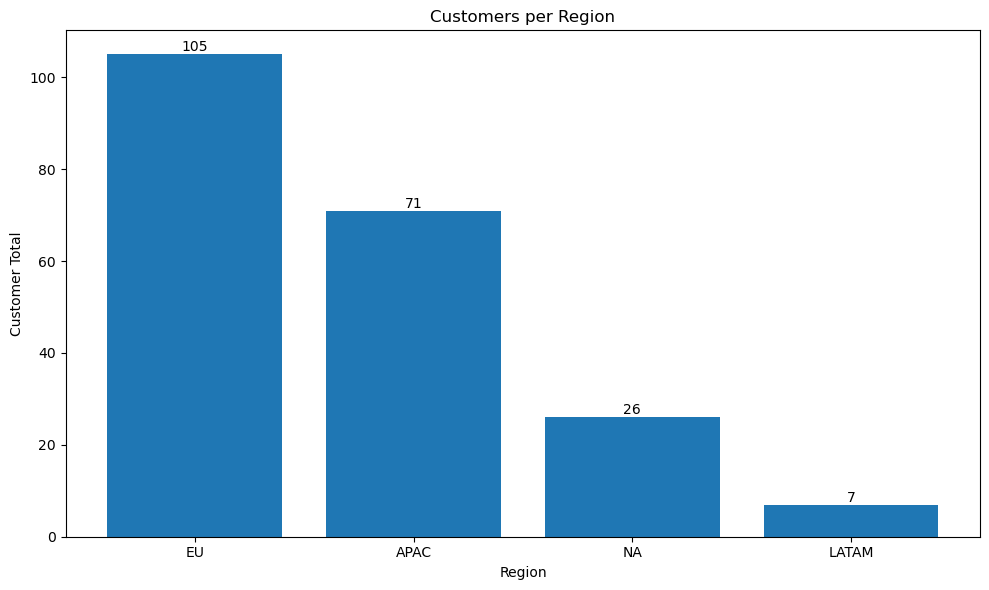

In [118]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_grp["region"], region_grp["customer_total"])

# Add text labels on the bars
for i, value in enumerate(region_grp["customer_total"]):
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")

# Set the title and labels
plt.title("Customers per Region")
plt.xlabel("Region")
plt.ylabel("Customer Total")

# Adjust text size and visibility
plt.tight_layout()

# Show the bar chart
plt.show()

<font size="3">Lets get the customers and an orders table together

In [27]:
dim_customer.head(2)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC


In [28]:
fact_sales_monthly.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [29]:
#To see the datatypes 
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [30]:
dim_product.head(2)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus


### Combine the customers table with customer code to pre discount ON customer code (average disocunt per customer per year)

<font size="3">Use Inner Join to join the two tables but if we have unmatched rows, they will not be shown as unmatched rows will return NULL values

In [31]:
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [32]:
fact_pre_discount.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057


In [33]:
#Query to determine avaerage customer discount and join the two above tables
dis_query = """
SELECT cust.customer_code,
       cust.customer,
       cust.market,
       disc.fiscal_year,
       disc.pre_invoice_discount_pct
FROM dim_customer as cust 
INNER JOIN fact_pre_discount as disc on cust.customer_code = disc.customer_code;
"""

cust_discnt = pd.read_sql_query(dis_query, con)
cust_discnt.head(8)


,customer_code,customer,market,fiscal_year,pre_invoice_discount_pct
0,70002017,Atliq Exclusive,India,2018,0.0824
1,70002017,Atliq Exclusive,India,2019,0.0777
2,70002017,Atliq Exclusive,India,2020,0.0735
3,70002017,Atliq Exclusive,India,2021,0.0703
4,70002017,Atliq Exclusive,India,2022,0.1057
5,70002018,Atliq e Store,India,2018,0.2956
6,70002018,Atliq e Store,India,2019,0.2577
7,70002018,Atliq e Store,India,2020,0.2255


<font size="3">It may look like repeating data but it's not, it's taking the customer data for each year in the datasets timeframe.</font>

In [34]:
#grouping by customer code as customer name does not distinguish the different codes/markets
cda = cust_discnt.groupby(['customer_code'])['pre_invoice_discount_pct'].mean().reset_index()

# Rename the column to indicate it's the average rate
cda.rename(columns={'pre_invoice_discount_pct': 'average_discnt'}, inplace=True)

#cda['average_discnt'] = cda['average_discnt'].apply(lambda x: '{:.2%}'.format(x))
# Print the resulting DataFrame
cda


,customer_code,average_discnt
0,70002017,0.08192
1,70002018,0.25560
2,70003181,0.06628
3,70003182,0.20872
4,70004069,0.08166
...,...,...
204,90024183,0.22778
205,90024184,0.22866
206,90025209,0.26714
207,90026205,0.27266


In [35]:
cda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_code   209 non-null    int64  
 1   average_discnt  209 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


<font size="3">Since the database is locked, will have to use python to join the newly created cda df to the dim_customers

In [36]:
#this will merge the newly created cda df to the customers df on customer code so we can see what customers
#are tied to the customer numbers
new_cust_dis = pd.merge(cda, dim_customer, on = 'customer_code', how = "inner")

new_cust_dis

,customer_code,average_discnt,customer,platform,channel,market,sub_zone,region
0,70002017,0.08192,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,0.25560,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,0.06628,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,0.20872,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,0.08166,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
...,...,...,...,...,...,...,...,...
204,90024183,0.22778,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,LATAM,LATAM
205,90024184,0.22866,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM
206,90025209,0.26714,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,LATAM,LATAM
207,90026205,0.27266,Amazon,E-Commerce,Retailer,Mexico,LATAM,LATAM


In [37]:
# Group data by customer name and calculate the sum
grouped = new_cust_dis.groupby('customer')['average_discnt'].mean().reset_index()

In [38]:
# Assuming you have already created the 'region_grp' DataFrame
fig = px.bar(grouped, x="customer", y="average_discnt", title="Average Customer Discount")

# Add the customer_total values as text on the bars
fig.update_traces(text=grouped['average_discnt'], texttemplate='%{text:.2s}', textposition='outside')

# Adjust text size and visibility
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the bar chart
fig.show()

<font size="3"> The majority of the customer discounts range between 21-27% except for AtliQ Exclusive which is 8%.  Odd that a subsidary of AtliQ has the lowest discount but they may get special pricing as a subsidary. More information is needed on that.

<hr style="border:2px solid black">

# Customer to Products Analysis

<font size="3">This section will create a full and detailed customers table that will be exported to tableau where customer segmentation can be visualized better.  If there are any plots in this section it's to get an idea of what to focus on in the main visualization environment.

In [39]:
# Query to combine customer df with products and group by customer_code. Get gross price from price df
custprod_query = """
SELECT cust.customer_code,
       cust.product_code,
       cust.sold_quantity,
       cust.date,
       dp.product_code,
       dp.category,
       dp.segment,
       dp.product,
       dp.variant,
       gfp.product_code,
       gfp.gross_price,
       gfp.fiscal_year,
       SUM(cust.sold_quantity) as total_sold_quantity
      
FROM
    fact_sales_monthly as cust
    INNER JOIN dim_product as dp on cust.product_code = dp.product_code
    INNER JOIN fact_gross_price as gfp on dp.product_code = gfp.product_code
GROUP BY cust.customer_code;  -- Group by customer_code
"""

full_cust = pd.read_sql_query(custprod_query, con)



In [40]:
full_cust.head(2)

,customer_code,product_code,sold_quantity,date,product_code,category,segment,product,variant,product_code,gross_price,fiscal_year,total_sold_quantity
0,70002017,A0118150101,51,2017-09-01,A0118150101,Internal HDD,Peripherals,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,A0118150101,15.3952,2018,205108
1,70002018,A0118150101,77,2017-09-01,A0118150101,Internal HDD,Peripherals,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,A0118150101,15.3952,2018,230260


In [41]:
full_cust.shape

(209, 13)

<font size="3"> Again we can see that our 209 unique customers pulled over. 

In [42]:
new_cust_dis.head(2)

,customer_code,average_discnt,customer,platform,channel,market,sub_zone,region
0,70002017,0.08192,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,0.25560,Atliq e Store,E-Commerce,Direct,India,India,APAC


In [43]:
new_cust_dis.shape

(209, 8)

<font size="3">Both dataframes have the same number of rows so that goods going into to merging the two of them. 

In [44]:
# Merge df1 with selected columns from df2
# Merge entire df1 with selected columns from df2 based on the common column
atliq_cust_tbl = full_cust.merge(new_cust_dis[['customer_code', 'customer', 'average_discnt', 'platform', 'market', 'region']], on='customer_code', how='left')

atliq_cust_tbl.head(2) # Select the columns you want from df2



,customer_code,product_code,sold_quantity,date,product_code,category,segment,product,variant,product_code,gross_price,fiscal_year,total_sold_quantity,customer,average_discnt,platform,market,region
0,70002017,A0118150101,51,2017-09-01,A0118150101,Internal HDD,Peripherals,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,A0118150101,15.3952,2018,205108,Atliq Exclusive,0.08192,Brick & Mortar,India,APAC
1,70002018,A0118150101,77,2017-09-01,A0118150101,Internal HDD,Peripherals,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,A0118150101,15.3952,2018,230260,Atliq e Store,0.25560,E-Commerce,India,APAC


In [45]:
atliq_cust_tbl.shape

(209, 18)

In [46]:
# PLOT CUSTOMERS AND HOW MANY PRODUCTS
fig = px.bar(atliq_cust_tbl, x="market", y="total_sold_quantity", title="Total Sold by Region")

# Add the customer_total values as text on the bars
fig.update_traces(text=atliq_cust_tbl['total_sold_quantity'], texttemplate='%{text:.2s}', textposition='outside')

# Adjust text size and visibility
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the bar chart
fig.show()

<font size="3"><b>Insight:</b> India, USA and South Korea have the highest customer  product totals.  It makes sense for India to be at the top since AtliQ is an India based business.  The bar chart has grouped all of the customers for that region, hence the lines in the bars. 

In [47]:
# PLOT CUSTOMERS AND HOW MANY PRODUCTS
fig = px.bar(atliq_cust_tbl, x="customer", y="total_sold_quantity", title="Amount Sold to Customer")

# Adjust text size and visibility
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the bar chart
fig.show()

<font size="3"><b>Insight:</b>  Breaking down the product variable by customer, we can now see why the US had such a high ranking in the previous plot. Amazon has over 1 million products. This may be due to the nature of the Amazon platform and it's ease of use to sell items and which has a vast customer base. 

<hr style="border:2px solid black">

# Can we determine LTV rate?

<font size="3"> Given the life of the data, we will see what type of cohort analysis will be possible by starting with the LTV; lifetime value of the customers. First to prepare the data.

In [48]:
# Merge df1 with selected columns from df2
# Merge entire df1 with selected columns from df2 based on the common column
ltv_test= fact_gross_price.merge(fact_sales_monthly[['product_code', 'customer_code', 'date', 'sold_quantity']], on='product_code', how='left')

ltv_test.head(2)

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0
1,A0118150101,2018,15.3952,70002018.0,2017-09-01,77.0


In [49]:
ltv_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265174 entries, 0 to 265173
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   265174 non-null  object 
 1   fiscal_year    265174 non-null  int64  
 2   gross_price    265174 non-null  float64
 3   customer_code  264044 non-null  float64
 4   date           264044 non-null  object 
 5   sold_quantity  264044 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.2+ MB


In [50]:
ltv_test['date'] = pd.to_datetime(ltv_test['date'], format='%Y-%m-%d') #format the date type

In [51]:
ltv_test.info() #double check that formatting has taken place

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265174 entries, 0 to 265173
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   product_code   265174 non-null  object        
 1   fiscal_year    265174 non-null  int64         
 2   gross_price    265174 non-null  float64       
 3   customer_code  264044 non-null  float64       
 4   date           264044 non-null  datetime64[ns]
 5   sold_quantity  264044 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 14.2+ MB


In [52]:
ltv_test['order_month'] = ltv_test['date'].astype('datetime64[M]')
ltv_test[["gross_price", "sold_quantity"]] = ltv_test[["gross_price", "sold_quantity"]].apply(pd.to_numeric)
#change to proper data types

In [53]:
#GROSS PRICE X SOLD QUANTITY
ltv_test['ltv_prd_cost'] = ltv_test['gross_price'] * ltv_test['sold_quantity']

In [54]:
#Now let's retrieve the month of each customer's first purchase:
first_orders = ltv_test.groupby('customer_code').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['customer_code', 'first_order_month']

In [55]:
#We'll calculate the number of new customers (n_buyers) for each month:
ltv_cohort_sizes = first_orders.groupby('first_order_month').agg({'customer_code': 'nunique'}).reset_index()
ltv_cohort_sizes.columns = ['first_order_month', 'n_buyers']
ltv_cohort_sizes 

,first_order_month,n_buyers
0,2017-09-01,84
1,2017-10-01,25
2,2018-09-01,36
3,2018-10-01,15
4,2019-09-01,37
5,2019-10-01,12


In [56]:
orders_ = pd.merge(ltv_test,first_orders, on='customer_code')
orders_.head()

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0,2017-09-01,785.1552,2017-09-01
1,A0118150101,2018,15.3952,70002017.0,2017-10-01,54.0,2017-10-01,831.3408,2017-09-01
2,A0118150101,2018,15.3952,70002017.0,2017-11-01,30.0,2017-11-01,461.8560,2017-09-01
3,A0118150101,2018,15.3952,70002017.0,2018-01-01,14.0,2018-01-01,215.5328,2017-09-01
4,A0118150101,2018,15.3952,70002017.0,2018-02-01,62.0,2018-02-01,954.5024,2017-09-01


In [57]:
#Now we'll group the table of orders by month of first purchase and month of purchase and sum up the revenue. 
#We'll set the index to the default using the reset_index() method:

cohorts_grp = orders_.groupby(['first_order_month','order_month']).agg({'gross_price': 'sum'}).reset_index()
cohorts_grp.head() 

,first_order_month,order_month,gross_price
0,2017-09-01,2017-09-01,52518.6702
1,2017-09-01,2017-10-01,32103.8854
2,2017-09-01,2017-11-01,31923.3151
3,2017-09-01,2017-12-01,31285.1109
4,2017-09-01,2018-01-01,47198.7376


In [58]:
# Let's add data on how many users made their first purchases in each month to the cohorts table:

report1 = pd.merge(ltv_cohort_sizes, cohorts_grp, on='first_order_month')
report1.head() 

,first_order_month,n_buyers,order_month,gross_price
0,2017-09-01,84,2017-09-01,52518.6702
1,2017-09-01,84,2017-10-01,32103.8854
2,2017-09-01,84,2017-11-01,31923.3151
3,2017-09-01,84,2017-12-01,31285.1109
4,2017-09-01,84,2018-01-01,47198.7376


In [59]:
#Now to find cohort age

report1['age'] = (report1['order_month'] - report1['first_order_month']) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')

report1.head() 

,first_order_month,n_buyers,order_month,gross_price,age
0,2017-09-01,84,2017-09-01,52518.6702,0
1,2017-09-01,84,2017-10-01,32103.8854,1
2,2017-09-01,84,2017-11-01,31923.3151,2
3,2017-09-01,84,2017-12-01,31285.1109,3
4,2017-09-01,84,2018-01-01,47198.7376,4


In [60]:
#determine LTV
report1['ltv'] = report1['gross_price'] / report1['n_buyers']

report1.head()

,first_order_month,n_buyers,order_month,gross_price,age,ltv
0,2017-09-01,84,2017-09-01,52518.6702,0,625.222264
1,2017-09-01,84,2017-10-01,32103.8854,1,382.189112
2,2017-09-01,84,2017-11-01,31923.3151,2,380.039465
3,2017-09-01,84,2017-12-01,31285.1109,3,372.441796
4,2017-09-01,84,2018-01-01,47198.7376,4,561.889733


In [61]:
report1_piv=report1.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)# cumulative value

report1_piv.fillna('')


age,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
first_order_month,,,,,,,,,,,,,,,,,,,,,
2017-09-01,625.222264,1007.411376,1387.450842,1759.892638,2321.782371,2701.812764,3073.357038,3437.276973,3997.361754,4373.111158,...,25023.820323,25608.416632,26501.254632,27107.108989,27702.334323,28286.930632,29035.183432,29542.926404,30041.761604,30531.689032
2017-10-01,636.434836,1270.019072,1910.426572,,2522.460552,3151.181972,3785.899144,,4406.259920,5030.942336,...,26073.632272,,26966.470272,27859.308272,28752.146272,,29500.399072,30248.651872,30996.904672,
2018-09-01,786.807625,1297.223469,1833.372086,2394.818481,3182.028994,3687.998342,4208.185681,4761.344356,5539.294544,6006.110403,...,,,,,,,,,,
2018-10-01,779.475867,1592.748233,2385.531193,,3171.278320,3951.927113,4708.610220,,5458.215520,6142.792880,...,,,,,,,,,,
2019-09-01,820.936919,1385.120930,1962.653049,2508.897714,3346.625257,3913.316359,4237.747978,4658.828041,5309.628889,5770.779073,...,,,,,,,,,,
2019-10-01,853.185017,1698.387417,2543.413500,,3369.577867,3842.919267,4523.352867,,5302.863125,6128.018150,...,,,,,,,,,,


<font size="3"> There is a longer customer lifetime of over 5 years which is why the cohort age goes to 52 (a little over 5 years); first_order_month goes all the way back to 2017 for some customers.  We will work with the data some more to see if give a better reflection of LTV.  As the data is now, the graph will be unreadable but we have tied other data to the above so table will remain in place.

In [62]:
orders_

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0,2017-09-01,785.1552,2017-09-01
1,A0118150101,2018,15.3952,70002017.0,2017-10-01,54.0,2017-10-01,831.3408,2017-09-01
2,A0118150101,2018,15.3952,70002017.0,2017-11-01,30.0,2017-11-01,461.8560,2017-09-01
3,A0118150101,2018,15.3952,70002017.0,2018-01-01,14.0,2018-01-01,215.5328,2017-09-01
4,A0118150101,2018,15.3952,70002017.0,2018-02-01,62.0,2018-02-01,954.5024,2017-09-01
...,...,...,...,...,...,...,...,...,...
264039,A0418150103,2022,21.0913,90020102.0,2021-06-01,4.0,2021-06-01,84.3652,2019-09-01
264040,A0418150103,2022,21.0913,90020102.0,2021-08-01,7.0,2021-08-01,147.6391,2019-09-01
264041,A0418150103,2022,21.0913,90020102.0,2021-09-01,17.0,2021-09-01,358.5521,2019-09-01
264042,A0418150103,2022,21.0913,90020102.0,2021-10-01,33.0,2021-10-01,696.0129,2019-09-01


In [63]:
orders_.isnull().sum()

product_code         0
fiscal_year          0
gross_price          0
customer_code        0
date                 0
sold_quantity        0
order_month          0
ltv_prd_cost         0
first_order_month    0
dtype: int64

In [64]:
dim_customer.head(2)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC


In [65]:
# Perform a left join on customer_id to add customer_name to df1
orders_named = orders_.merge(dim_customer[['customer_code', 'customer', 'platform', 'market', 'region']], on='customer_code', how='left')
orders_named.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264044 entries, 0 to 264043
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   product_code       264044 non-null  object        
 1   fiscal_year        264044 non-null  int64         
 2   gross_price        264044 non-null  float64       
 3   customer_code      264044 non-null  float64       
 4   date               264044 non-null  datetime64[ns]
 5   sold_quantity      264044 non-null  float64       
 6   order_month        264044 non-null  datetime64[ns]
 7   ltv_prd_cost       264044 non-null  float64       
 8   first_order_month  264044 non-null  datetime64[ns]
 9   customer           264044 non-null  object        
 10  platform           264044 non-null  object        
 11  market             264044 non-null  object        
 12  region             264044 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(1), 

In [66]:
orders_named.head()

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month,customer,platform,market,region
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0,2017-09-01,785.1552,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
1,A0118150101,2018,15.3952,70002017.0,2017-10-01,54.0,2017-10-01,831.3408,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
2,A0118150101,2018,15.3952,70002017.0,2017-11-01,30.0,2017-11-01,461.8560,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
3,A0118150101,2018,15.3952,70002017.0,2018-01-01,14.0,2018-01-01,215.5328,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
4,A0118150101,2018,15.3952,70002017.0,2018-02-01,62.0,2018-02-01,954.5024,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC


In [67]:
#orders_named.to_csv('atliq_cust_orders.csv', index=False) *Inactive code used to download dataframe.  Can make active to
#re-download df if needed.

## Cohort Analysis - Customer Retention?


<font size= "3"> Now to work with the transformed data to see what we can get customer retention wise.

In [68]:
ca2 = orders_named[['customer_code', 'date']]
ca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264044 entries, 0 to 264043
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_code  264044 non-null  float64       
 1   date           264044 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 MB


In [69]:
# Specify the year you want to filter the data by
target_year = 2021

# Filter the DataFrame to show records only from the target year
filtered_ca = ca2[ca2['date'].dt.year == target_year]

# Print the filtered DataFrame
filtered_ca.head()

,customer_code,date
30,70002017.0,2021-01-01
31,70002017.0,2021-02-01
32,70002017.0,2021-03-01
33,70002017.0,2021-05-01
34,70002017.0,2021-06-01


In [70]:
fil_ca_ret = filtered_ca.copy()#copying to get untethered table. 

In [71]:
#function for month - this is will just have the year and month with the day being defaulted to 1
def get_month(x):
        return dt.datetime(x.year, x.month,1)
#apply the function    
fil_ca_ret['visit_month'] = fil_ca_ret['date'].apply(get_month)
fil_ca_ret.head()

,customer_code,date,visit_month
30,70002017.0,2021-01-01,2021-01-01
31,70002017.0,2021-02-01,2021-02-01
32,70002017.0,2021-03-01,2021-03-01
33,70002017.0,2021-05-01,2021-05-01
34,70002017.0,2021-06-01,2021-06-01


In [72]:
#create cohort month based on visit month. first month of user's visit. creating a column index for month cohort
#first month user visited
fil_ca_ret['cohort_month'] = fil_ca_ret.groupby('customer_code')['visit_month'].transform('min')#'min' used to get the first occurance  
fil_ca_ret.head()

,customer_code,date,visit_month,cohort_month
30,70002017.0,2021-01-01,2021-01-01,2021-01-01
31,70002017.0,2021-02-01,2021-02-01,2021-01-01
32,70002017.0,2021-03-01,2021-03-01,2021-01-01
33,70002017.0,2021-05-01,2021-05-01,2021-01-01
34,70002017.0,2021-06-01,2021-06-01,2021-01-01


In [73]:
#create date element function to get a series for subtraction
def get_date_elements(df,column):
    day = df[column].dt.day # this will be applied to cohort month column
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [74]:
#get date elements for visit and cohort columns

#_ because we are focusing on month and need 3 elements so '_' acts as a place holder
_,visit_month, visit_year = get_date_elements(fil_ca_ret, 'visit_month') #_ because we are focusing on month and need 3 elements
_,cohort_month, cohort_year = get_date_elements(fil_ca_ret, 'cohort_month')

In [75]:
#create cohort index - when user acquired 
year_diff = visit_year - cohort_year
month_diff = visit_month - cohort_month

#adding +1 at the end is optional its for those that only visited on their first day
fil_ca_ret['cohort_index'] = year_diff*12+month_diff #multiply by 12 since 12 months in a year

fil_ca_ret.head()

,customer_code,date,visit_month,cohort_month,cohort_index
30,70002017.0,2021-01-01,2021-01-01,2021-01-01,0
31,70002017.0,2021-02-01,2021-02-01,2021-01-01,1
32,70002017.0,2021-03-01,2021-03-01,2021-01-01,2
33,70002017.0,2021-05-01,2021-05-01,2021-01-01,4
34,70002017.0,2021-06-01,2021-06-01,2021-01-01,5


In [76]:
#count user ids by groupby by customer, cohort month(when they were acquired) and index(how long they've been active)
#used apply for better reliability
cohort_data = fil_ca_ret.groupby(['cohort_month', 'cohort_index'])['customer_code'].apply(pd.Series.nunique).reset_index()
#reset index eliminates gaps (each row has the cohort month filled in)
cohort_data.head()

,cohort_month,cohort_index,customer_code
0,2021-01-01,0,157
1,2021-01-01,1,105
2,2021-01-01,2,105
3,2021-01-01,3,104
4,2021-01-01,4,157


In [77]:
#create pivot table
cohort_table = cohort_data.pivot(index = 'cohort_month', columns=['cohort_index'], values= 'customer_code')
cohort_table

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2021-01-01,157.0,105.0,105.0,104.0,157.0,105.0,105.0,104.0,157.0,105.0,105.0,104.0
2021-02-01,52.0,52.0,52.0,NaN,52.0,52.0,52.0,NaN,52.0,52.0,52.0,NaN


In [78]:
#to find the rentention percentages
retention_percentage = cohort_table.divide(cohort_table.iloc[:,0], axis=0).round(4)
#divide cohort table. isoloate with iloc. give me all the rows with just the first column[:,0].  divide by row(axis=0)
retention_percentage

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2021-01-01,1.0,0.6688,0.6688,0.6624,1.0,0.6688,0.6688,0.6624,1.0,0.6688,0.6688,0.6624
2021-02-01,1.0,1.0000,1.0000,NaN,1.0,1.0000,1.0000,NaN,1.0,1.0000,1.0000,NaN


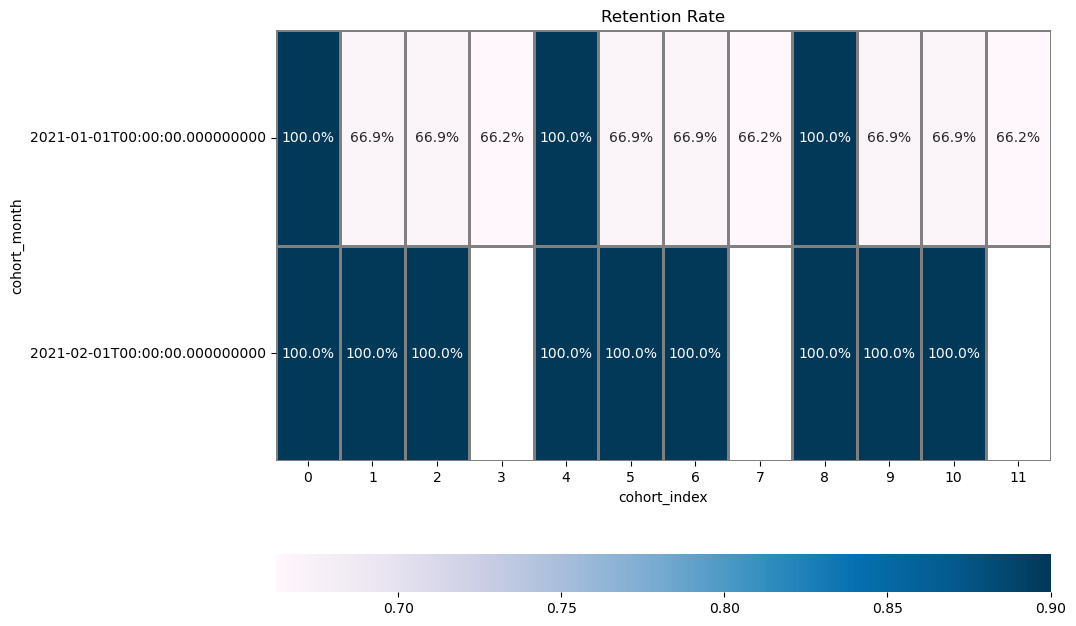

In [79]:
import matplotlib.pyplot as plt
#retention heatmap
plt.figure(figsize=(10,8))
sns.heatmap(retention_percentage, annot=True, fmt='.1%', linewidths=1, cmap='PuBu', linecolor='grey',  vmax=.9, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

<font size="3"><b>Conclusion on Customer Retention:</b> AtliQ's customer base has only slight fluctuations in numbers.  The customer numbers stay fairly consistant.  Values not 100, show the slight change in customer numbers.  AtliQ has a strong customer base in that there is not a lot of turnover(numbers are not jumping up and down).

## Churn rate customers

In [80]:
orders_named.head(2)

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month,customer,platform,market,region
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0,2017-09-01,785.1552,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
1,A0118150101,2018,15.3952,70002017.0,2017-10-01,54.0,2017-10-01,831.3408,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC


In [81]:

import numpy as np
churn_users = orders_named[['customer_code', 'date']]
churn_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264044 entries, 0 to 264043
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_code  264044 non-null  float64       
 1   date           264044 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 MB


In [82]:
churn_users.head()

,customer_code,date
0,70002017.0,2017-09-01
1,70002017.0,2017-10-01
2,70002017.0,2017-11-01
3,70002017.0,2018-01-01
4,70002017.0,2018-02-01


In [83]:
# Define the churn criteria (e.g., customers who haven't had activity since a certain date)
churn_date_threshold = '2019-01-01'#we'll use the first of 2022 as a threshold

# Filter the DataFrame to include only customers who have churned
churned_customers = churn_users[churn_users['date'] < churn_date_threshold]

# Calculate the churn rate
total_customers = churn_users['customer_code'].nunique()
churned_count = churned_customers['customer_code'].nunique()
churn_rate = round((churned_count / total_customers)*100,2)

print("Total Customers:", total_customers)
print("Churned Customers:", churned_count)
print("Churn Rate:", churn_rate)

Total Customers: 209
Churned Customers: 160
Churn Rate: 76.56


<font size="3"><b>Insight:</b> According to the above churn rate for 2019, 76.56% customers were retained.  Note that the churn rate will fluctuate based on date selected for "churn_date_threshold". A better visualization may be possible in the dashboard

## Average Purchase Size

In [84]:
#determine average purchase with mean.  round values
avg_pur = orders_named.groupby(['order_month']).agg({'ltv_prd_cost': 'mean'}).round().reset_index() 
avg_pur.head()

,order_month,ltv_prd_cost
0,2017-09-01,326.0
1,2017-10-01,463.0
2,2017-11-01,667.0
3,2017-12-01,692.0
4,2018-01-01,367.0


In [85]:
#plot the findings
fig = px.bar(avg_pur , x="order_month", y="ltv_prd_cost", text="ltv_prd_cost", title="Average customer purchase")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

<font size="3"><b>Insight:</b>  There seems to be a cycle in the plot where there is a four month increase in purchases by the customer. This increase goes from September to December. It's extremly evident in 2021.  More information will need to be gathered to see if the lockdowns during the recent pandemic is the reason for the sudden spike in customer activity.

# Cohort Analysis

### How many orders do they make during a given period of time?

In [86]:
orders_named.head()

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month,customer,platform,market,region
0,A0118150101,2018,15.3952,70002017.0,2017-09-01,51.0,2017-09-01,785.1552,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
1,A0118150101,2018,15.3952,70002017.0,2017-10-01,54.0,2017-10-01,831.3408,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
2,A0118150101,2018,15.3952,70002017.0,2017-11-01,30.0,2017-11-01,461.8560,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
3,A0118150101,2018,15.3952,70002017.0,2018-01-01,14.0,2018-01-01,215.5328,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
4,A0118150101,2018,15.3952,70002017.0,2018-02-01,62.0,2018-02-01,954.5024,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC


In [87]:
#Assuming 'date_column' is the name of the date column in your DataFrame
unique_dates = orders_named['fiscal_year'].unique()

# If you want the unique dates as a sorted list, you can use the sorted function
unique_dates_sorted = sorted(unique_dates)

In [88]:
unique_dates_sorted # to see what years we are working with

[2018, 2019, 2020, 2021, 2022]

In [89]:
# Specify the year you want to filter from the date variable
target_year = 2021

# Filter the DataFrame to show records only from the target year
filtered_ltv = orders_named[orders_named['date'].dt.year == target_year]

# Print the filtered DataFrame
filtered_ltv.head()

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month,customer,platform,market,region
30,A0118150101,2018,15.3952,70002017.0,2021-01-01,119.0,2021-01-01,1832.0288,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
31,A0118150101,2018,15.3952,70002017.0,2021-02-01,174.0,2021-02-01,2678.7648,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
32,A0118150101,2018,15.3952,70002017.0,2021-03-01,161.0,2021-03-01,2478.6272,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
33,A0118150101,2018,15.3952,70002017.0,2021-05-01,187.0,2021-05-01,2878.9024,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC
34,A0118150101,2018,15.3952,70002017.0,2021-06-01,123.0,2021-06-01,1893.6096,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC


In [90]:
filtered_ltv.shape #the filtered data frame; filtered on year from date variable

(72100, 13)

In [91]:
#We'll calculate the (n_buyers) for each order month as it's 2021:
focohort_sizes = filtered_ltv.groupby('order_month').agg({'customer_code': 'nunique'}).reset_index()
focohort_sizes.columns = ['month', 'n_buyers']
focohort_sizes

,month,n_buyers
0,2021-01-01,157
1,2021-02-01,157
2,2021-03-01,157
3,2021-04-01,156
4,2021-05-01,157
5,2021-06-01,157
6,2021-07-01,157
7,2021-08-01,156
8,2021-09-01,157
9,2021-10-01,157


<font size="3"> Again the above dataframe shows that there was almost no significant change in n_buyers/customer numbers. 

In [92]:
#group orders by first order month and order_month and count revenue

cohort_pur=filtered_ltv.groupby(['first_order_month','order_month'])['ltv_prd_cost'].count().reset_index()
# renaming columns
cohort_pur.columns=['first_order_month','month','n_orders']
cohort_pur

,first_order_month,month,n_orders
0,2017-09-01,2021-01-01,3444
1,2017-09-01,2021-02-01,2337
2,2017-09-01,2021-03-01,2296
3,2017-09-01,2021-04-01,2255
4,2017-09-01,2021-05-01,3444
...,...,...,...
58,2019-10-01,2021-07-01,492
59,2019-10-01,2021-08-01,492
60,2019-10-01,2021-10-01,396
61,2019-10-01,2021-11-01,396


In [93]:
#Merge the order and buyers cohorts

orders_cohort = pd.merge(focohort_sizes, cohort_pur, on='month')
orders_cohort


,month,n_buyers,first_order_month,n_orders
0,2021-01-01,157,2017-09-01,3444
1,2021-01-01,157,2018-09-01,1476
2,2021-01-01,157,2019-09-01,1517
3,2021-02-01,157,2017-09-01,2337
4,2021-02-01,157,2017-10-01,1025
...,...,...,...,...
58,2021-12-01,156,2017-10-01,825
59,2021-12-01,156,2018-09-01,825
60,2021-12-01,156,2018-10-01,495
61,2021-12-01,156,2019-09-01,792


In [94]:
#find cohort age

orders_cohort['age'] = (orders_cohort['month'] - orders_cohort['first_order_month']) / np.timedelta64(1, 'M')
orders_cohort['age'] = orders_cohort['age'].round().astype('int')

orders_cohort.head() 

,month,n_buyers,first_order_month,n_orders,age
0,2021-01-01,157,2017-09-01,3444,40
1,2021-01-01,157,2018-09-01,1476,28
2,2021-01-01,157,2019-09-01,1517,16
3,2021-02-01,157,2017-09-01,2337,41
4,2021-02-01,157,2017-10-01,1025,40


<font size="3"> Cohort ages are high due to the increased time span of customers first orders.

In [95]:
#buyers for each cohort
orders_cohort['orders_per_buyer'] = orders_cohort['n_orders']/orders_cohort['n_buyers']
orders_cohort.head()

,month,n_buyers,first_order_month,n_orders,age,orders_per_buyer
0,2021-01-01,157,2017-09-01,3444,40,21.936306
1,2021-01-01,157,2018-09-01,1476,28,9.401274
2,2021-01-01,157,2019-09-01,1517,16,9.662420
3,2021-02-01,157,2017-09-01,2337,41,14.885350
4,2021-02-01,157,2017-10-01,1025,40,6.528662


In [96]:
orders_cohort.info()#checking data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              63 non-null     datetime64[ns]
 1   n_buyers           63 non-null     int64         
 2   first_order_month  63 non-null     datetime64[ns]
 3   n_orders           63 non-null     int64         
 4   age                63 non-null     int32         
 5   orders_per_buyer   63 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2)
memory usage: 3.2 KB


In [97]:
# building pivot table to show the orders per buyer divided in ages by cohorts
cohort_optp_piv=orders_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1).round()

cohort_optp_piv.round(2).fillna('')

age,16,17,18,19,20,21,22,23,24,25,...,42,43,44,45,46,47,48,49,50,51
first_order_month,,,,,,,,,,,,,,,,,,,,,
2017-09-01,,,,,,,,,,,...,51.0,66.0,88.0,103.0,117.0,132.0,149.0,161.0,173.0,185.0
2017-10-01,,,,,,,,,,,...,20.0,,26.0,33.0,39.0,,45.0,50.0,55.0,
2018-09-01,,,,,,,,,,,...,,,,,,,,,,
2018-10-01,,,,,,,,,,,...,,,,,,,,,,
2019-09-01,10.0,16.0,23.0,29.0,39.0,45.0,52.0,58.0,66.0,71.0,...,,,,,,,,,,
2019-10-01,3.0,6.0,9.0,,13.0,16.0,19.0,,21.0,24.0,...,,,,,,,,,,


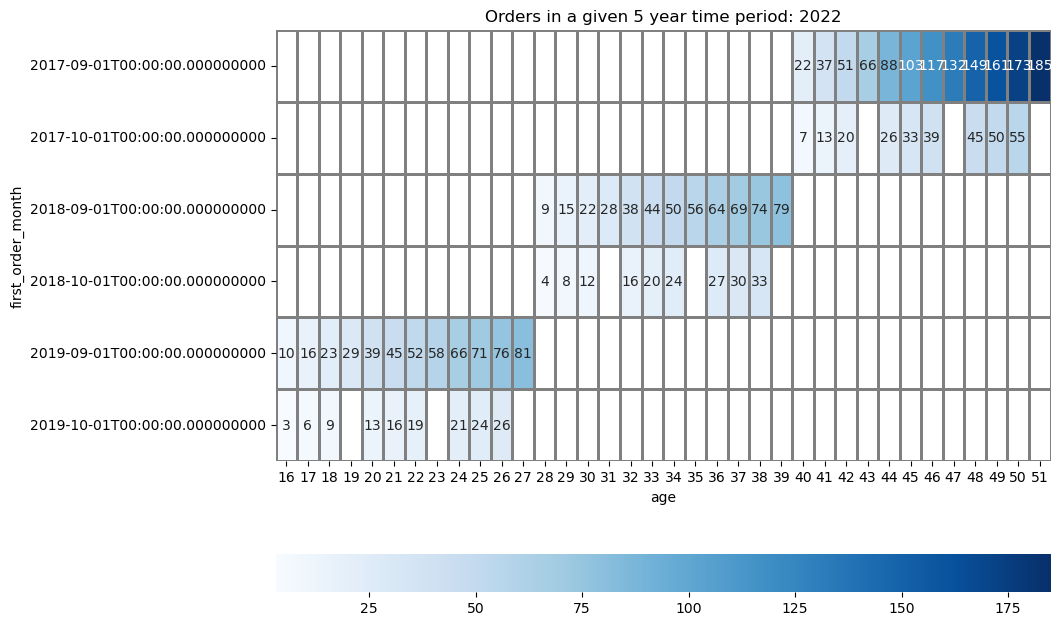

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(cohort_optp_piv, annot=True, linewidths=1, cmap='Blues', fmt='.0f', linecolor='grey', cbar_kws= {'orientation': 'horizontal'}, 
            ).set(title = 'Orders in a given 5 year time period: 2022')

plt.show()

<font size="3"><b>Insight:</b> The cohort looks the way it does because of the 5 year time frame and it is working with first order months which are 6 years ago. The dataframe was filtered to show values from 2021.  We can see in the cohorts has the numbers show a continuous uptick in numbers before falling only to rise again. 

## Lets try LTV again
<font size= "3">Now that the data has been processed further, one more cohort analysis will be done.

In [99]:
focohort_sizes.head()

,month,n_buyers
0,2021-01-01,157
1,2021-02-01,157
2,2021-03-01,157
3,2021-04-01,156
4,2021-05-01,157


In [100]:
filtered_ltv.head(1)

,product_code,fiscal_year,gross_price,customer_code,date,sold_quantity,order_month,ltv_prd_cost,first_order_month,customer,platform,market,region
30,A0118150101,2018,15.3952,70002017.0,2021-01-01,119.0,2021-01-01,1832.0288,2017-09-01,Atliq Exclusive,Brick & Mortar,India,APAC


In [101]:
ltvbuyers = filtered_ltv[['order_month','first_order_month', 'ltv_prd_cost']]
ltvbuyers.columns=['month','first_order_month','revenue']
ltvbuyers.round(2).head()

,month,first_order_month,revenue
30,2021-01-01,2017-09-01,1832.03
31,2021-02-01,2017-09-01,2678.76
32,2021-03-01,2017-09-01,2478.63
33,2021-05-01,2017-09-01,2878.90
34,2021-06-01,2017-09-01,1893.61


In [102]:
# Let's add data on how many users made their first purchases in each month to the cohorts table:

buyer_co = pd.merge(ltvbuyers, focohort_sizes, on='month')
buyer_co.head().round()

,month,first_order_month,revenue,n_buyers
0,2021-01-01,2017-09-01,1832.0,157
1,2021-01-01,2017-09-01,1718.0,157
2,2021-01-01,2017-09-01,1932.0,157
3,2021-01-01,2017-09-01,2268.0,157
4,2021-01-01,2017-09-01,3917.0,157


In [103]:

buyer_co['age'] = (buyer_co['month'] - buyer_co['first_order_month']) / np.timedelta64(1, 'M')
buyer_co['age'] = buyer_co['age'].round().astype('int')

buyer_co.head().round()

,month,first_order_month,revenue,n_buyers,age
0,2021-01-01,2017-09-01,1832.0,157,40
1,2021-01-01,2017-09-01,1718.0,157,40
2,2021-01-01,2017-09-01,1932.0,157,40
3,2021-01-01,2017-09-01,2268.0,157,40
4,2021-01-01,2017-09-01,3917.0,157,40


In [104]:
#determine LTV
buyer_co['ltv'] = buyer_co['revenue'] / buyer_co['n_buyers']

buyer_co.head().round()

,month,first_order_month,revenue,n_buyers,age,ltv
0,2021-01-01,2017-09-01,1832.0,157,40,12.0
1,2021-01-01,2017-09-01,1718.0,157,40,11.0
2,2021-01-01,2017-09-01,1932.0,157,40,12.0
3,2021-01-01,2017-09-01,2268.0,157,40,14.0
4,2021-01-01,2017-09-01,3917.0,157,40,25.0


In [105]:
report1_piv=buyer_co.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1).round()# cumulative value

report1_piv.fillna('')

age,16,17,18,19,20,21,22,23,24,25,...,42,43,44,45,46,47,48,49,50,51
first_order_month,,,,,,,,,,,,,,,,,,,,,
2017-09-01,,,,,,,,,,,...,75298.0,97331.0,129427.0,149688.0,171227.0,192888.0,307663.0,401197.0,539520.0,683724.0
2017-10-01,,,,,,,,,,,...,30601.0,,40570.0,50803.0,62013.0,,109955.0,166970.0,231286.0,
2018-09-01,,,,,,,,,,,...,,,,,,,,,,
2018-10-01,,,,,,,,,,,...,,,,,,,,,,
2019-09-01,3261.0,5436.0,7504.0,9689.0,13212.0,15428.0,17605.0,19934.0,31453.0,42208.0,...,,,,,,,,,,
2019-10-01,1039.0,2210.0,3228.0,,4443.0,5529.0,6636.0,,11686.0,18553.0,...,,,,,,,,,,


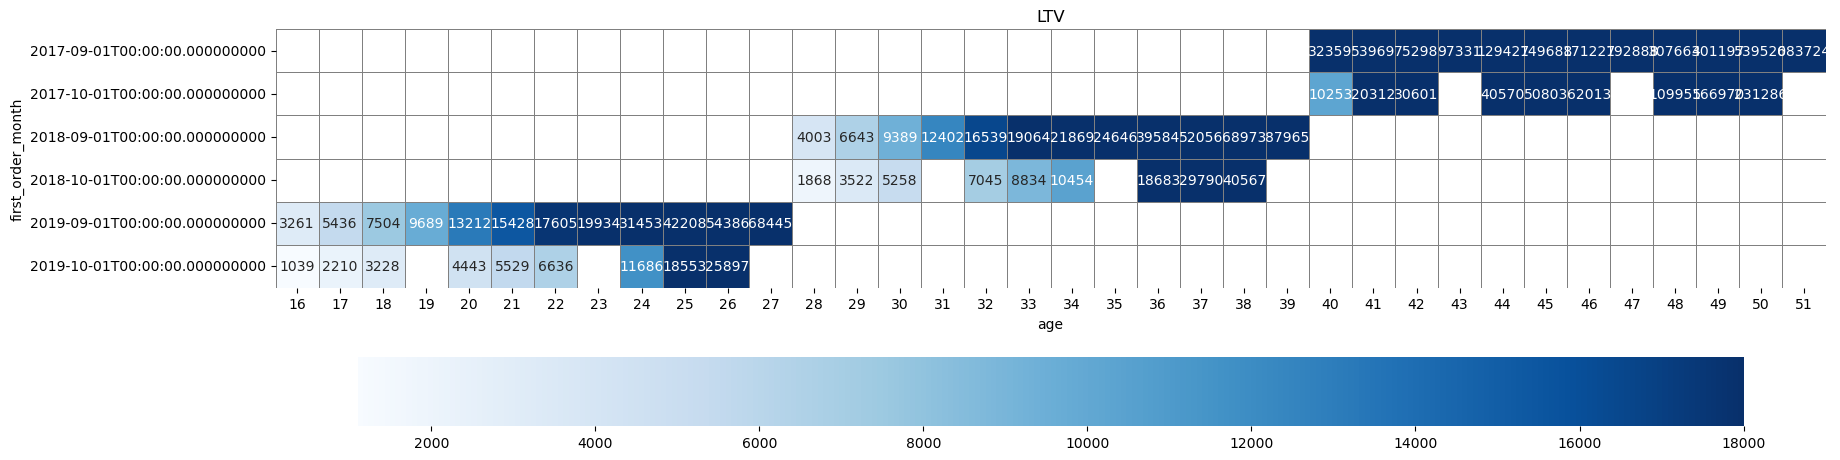

In [106]:
#heatmap
plt.figure(figsize=(20,6))
sns.heatmap(report1_piv, annot=True, linewidths=.5, cmap='Blues', fmt='.0f', linecolor='grey', vmax=18000, vmin=1100, cbar_kws= {'orientation': 'horizontal'}, 
            square=True).set(title = 'LTV')
plt.show()

#linewidths=2, ax=ax0,vmax=3000, vmin=0, square=True)

<font size="3"><b>Insight:</b>  Again, there is a pattern in the cohort where orders see cylical rise and fall.  Blanks are due to the dates taht orders were placed, some months have no orders

<hr style="border:2px solid black">

## Analysis Conclusion:

<font size="3"> AtliQ appears to have a dedicated customer base. There were no significant change in customer numbers that grossley affected purchase quantities. The current discount rates between 22-26% seems to hold onto the customers.  
    
<font size="3">The one area that may need further research is the 2021-22 time frame to see how the pandemic, lockdown and supply issues impacted the numbers. 2021 saw a drastic increase in cusomter purchases. One insight into this may have been the strict lockdowns imposed within AtliQ's competitor supply regions that customers typically used. Again more research into this is needed. 
    
<font size="3">It would be advisable to see other market competitors are recovering from the pandemic as this may impact customer purchasing behavior. If competitors that ranked high as a hardware supplier make a full recovery, other marketing tactics will need to be employed by AtliQ to stay competitive and hold onto their current customer base. 
    
<font size="3">From the above analysis and the cyclical trend that has been shown, AtliQ is on course to show more growth barring any outside factors. For a more overall analysis conclusion, the entire TTWC team will need to give their insights on the other areas of analysis.
    
    

<blockquote>
Project Resources:
<p>
    <li> Quick DBD for database flowchart layout</li>
<li> https://learnsql.com/blog/grouping-data-in-microsoft-sql-server/</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html</li>
<li>https://learnsql.com/blog/how-to-join-two-tables-in-sql/</li>
<li> Markdown Cheat Sheet - https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd</li>
<p>
Tableau Resources:
<li> https://www.tableau.com/blog/LOD-expressions</li>